<a href="https://colab.research.google.com/github/CIA-Oceanix/DLOA2023/blob/main/projects/notebook_demo_InterpolationUnet_NALT60GF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des données altimétriques

### Install dependencies

In [17]:
!pip install xarray[complete] eccodes hvplot -q

### Download netcdfs

#### Download NATL60 data

In [33]:
!wget -nc https://s3.us-east-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_ssh_y2013.1y.nc

--2023-06-29 11:57:21--  https://s3.us-east-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_ssh_y2013.1y.nc
Resolving s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)... 38.27.106.34, 38.27.106.100, 38.27.106.16, ...
Connecting to s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)|38.27.106.34|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.eu-central-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_ssh_y2013.1y.nc [following]
--2023-06-29 11:57:22--  https://s3.eu-central-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_ssh_y2013.1y.nc
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.23, 130.117.252.33, 130.117.252.19, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118023544 (113M) [application/x-netcdf]
Saving to: ‘NATL60-

In [34]:
!wget -nc https://s3.us-east-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_sst_y2013.1y.nc

--2023-06-29 11:57:29--  https://s3.us-east-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_sst_y2013.1y.nc
Resolving s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)... 38.27.106.34, 38.27.106.100, 38.27.106.16, ...
Connecting to s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)|38.27.106.34|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.eu-central-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_sst_y2013.1y.nc [following]
--2023-06-29 11:57:29--  https://s3.eu-central-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_sst_y2013.1y.nc
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.23, 130.117.252.33, 130.117.252.19, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117985248 (113M) [application/x-netcdf]
Saving to: ‘NATL60-

#### Download pseudo observation data

In [35]:
!wget -nc https://s3.us-east-1.wasabisys.com/melody/osse_data/data/gridded_data_swot_wocorr/dataset_nadir_0d_swot.nc


--2023-06-29 11:57:36--  https://s3.us-east-1.wasabisys.com/melody/osse_data/data/gridded_data_swot_wocorr/dataset_nadir_0d_swot.nc
Resolving s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)... 38.27.106.34, 38.27.106.100, 38.27.106.16, ...
Connecting to s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)|38.27.106.34|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.eu-central-1.wasabisys.com/melody/osse_data/data/gridded_data_swot_wocorr/dataset_nadir_0d_swot.nc [following]
--2023-06-29 11:57:36--  https://s3.eu-central-1.wasabisys.com/melody/osse_data/data/gridded_data_swot_wocorr/dataset_nadir_0d_swot.nc
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.23, 130.117.252.33, 130.117.252.19, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 708322336 (676M) [application

#### Download Duacs oi product made from pseudo observations

In [36]:
!wget -nc https://s3.us-east-1.wasabisys.com/melody/osse_data/oi/ssh_NATL60_swot_4nadir.nc

--2023-06-29 11:58:09--  https://s3.us-east-1.wasabisys.com/melody/osse_data/oi/ssh_NATL60_swot_4nadir.nc
Resolving s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)... 38.27.106.101, 38.27.106.33, 38.27.106.29, ...
Connecting to s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)|38.27.106.101|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.eu-central-1.wasabisys.com/melody/osse_data/oi/ssh_NATL60_swot_4nadir.nc [following]
--2023-06-29 11:58:10--  https://s3.eu-central-1.wasabisys.com/melody/osse_data/oi/ssh_NATL60_swot_4nadir.nc
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.28, 130.117.252.19, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235956168 (225M) [application/x-netcdf]
Saving to: ‘ssh_NATL60_swot_4nadir.nc’

ssh_NATL60_swot_4na 100%[=

## Read and visualize data

#### Imports

In [37]:
import xarray as xr
import pandas as pd
import scipy.ndimage as ndi
import numpy as np
import holoviews as hv

#### Read files

In [38]:
ref_ds = xr.open_dataset('NATL60-CJM165_GULFSTREAM_ssh_y2013.1y.nc', decode_times=False).assign_coords(time=lambda ds: pd.to_datetime(ds.time))
oi_ds = xr.open_dataset('ssh_NATL60_swot_4nadir.nc')
obs_ds = xr.open_dataset('dataset_nadir_0d_swot.nc')
sst_ds = xr.open_dataset('NATL60-CJM165_GULFSTREAM_sst_y2013.1y.nc')

#### Data description

**ssh** (Sea surface Height) One year long daily datasets provided by the NATL60 state-of-the-art oceanic simulation

In [39]:
ref_ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 201, lon: 201)
Coordinates:
  * lon      (lon) float64 -65.0 -64.95 -64.9 -64.85 ... -55.1 -55.05 -55.0
  * lat      (lat) float64 33.0 33.05 33.1 33.15 33.2 ... 42.85 42.9 42.95 43.0
  * time     (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2013-09-30
Data variables:
    ssh      (time, lat, lon) float64 ...

In [40]:
sst_ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 201, lon: 201)
Coordinates:
  * time     (time) datetime64[ns] 2012-10-01T12:00:00 ... 2013-09-30T12:00:00
  * lon      (lon) float64 -65.0 -64.95 -64.9 -64.85 ... -55.1 -55.05 -55.0
  * lat      (lat) float64 33.0 33.05 33.1 33.15 33.2 ... 42.85 42.9 42.95 43.0
Data variables:
    sst      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

**Pseudo-observations**

The pseudo-observations dataset is generated by sampling the SSH Ground Truth with realistic satellite trajectories dataset_nadir_0d_swot.nc :
- mask : mask (1 -> ocean, 0 -> land)
- lag : time deviation (in hour) to the selected day
- flag : satellite type (0 -> NADIR, 1 -> SWOT)
- ssh_obs: data with additional realistic noise
- ssh_mod: data without noise (=model)

In [41]:
obs_ds


<xarray.Dataset>
Dimensions:      (lat: 201, lon: 201, time: 365)
Coordinates:
  * lon          (lon) float64 -65.0 -64.95 -64.9 -64.85 ... -55.1 -55.05 -55.0
  * lat          (lat) float64 33.0 33.05 33.1 33.15 ... 42.85 42.9 42.95 43.0
  * time         (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2013-09-30
Data variables:
    mask         (lat, lon) float64 ...
    lag          (time, lat, lon) float64 ...
    flag         (time, lat, lon) float64 ...
    ssh_obs      (time, lat, lon) float64 ...
    ssh_mod      (time, lat, lon) float64 ...
    anomaly_obs  (time, lat, lon) float64 ...
    anomaly_mod  (time, lat, lon) float64 ...

**Optimal interpolation (OI)**

the state-of-the-art optimal interpolation (OI) dataset based on the previous pseudo-observations:
- ssh_obs: OI using ssh_obs in the pseudo-observations dataset
- ssh_mod: OI using ssh_mod in the pseudo-observations dataset

In [42]:
oi_ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 201, lon: 201)
Coordinates:
  * lon      (lon) float64 -65.0 -64.95 -64.9 -64.85 ... -55.1 -55.05 -55.0
  * lat      (lat) float64 33.0 33.05 33.1 33.15 33.2 ... 42.85 42.9 42.95 43.0
  * time     (time) datetime64[ns] 2012-10-01 2012-10-02 ... 2013-09-30
Data variables:
    ssh_mod  (time, lat, lon) float64 ...
    ssh_obs  (time, lat, lon) float64 ...

#### Visualize fields

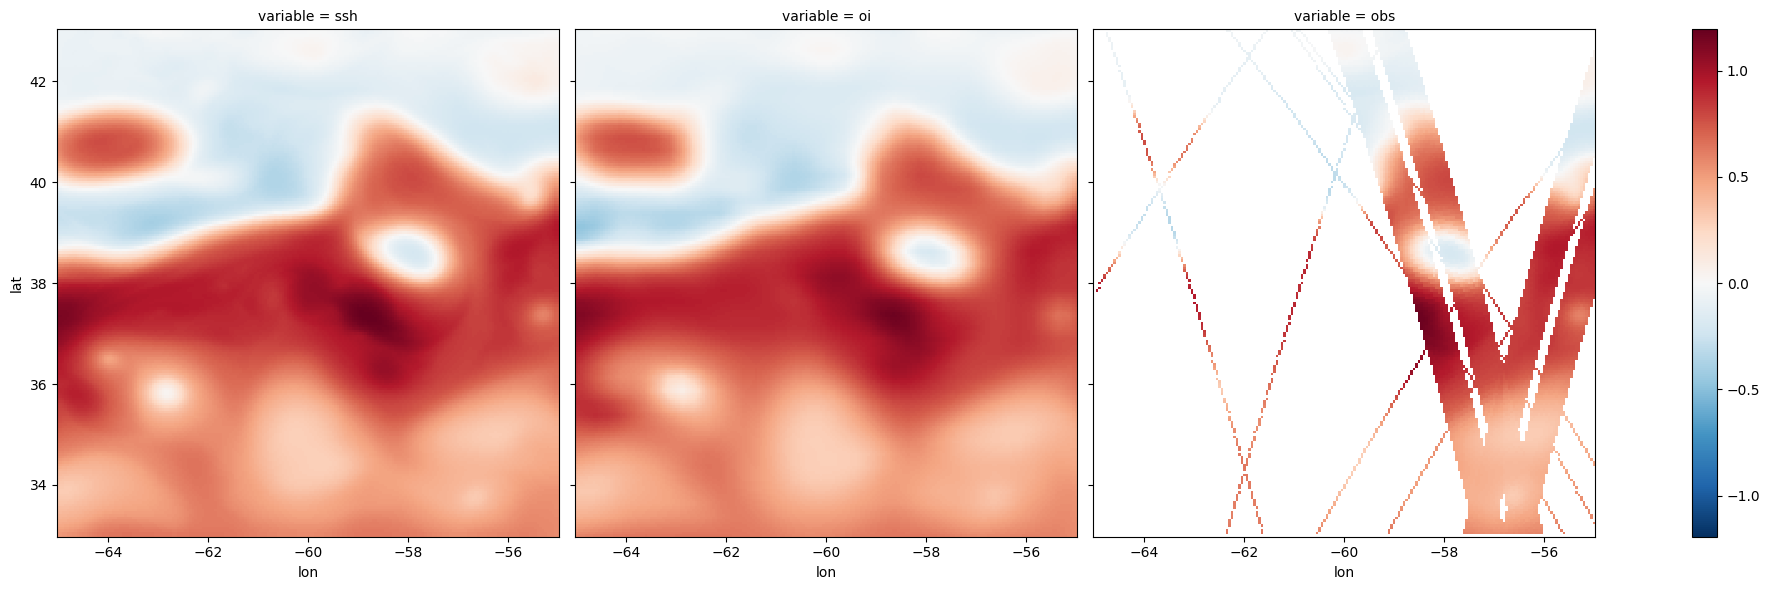

In [43]:
xr.Dataset({
    'ssh': ref_ds.ssh,
    'oi': oi_ds.ssh_mod,
    'obs': obs_ds.ssh_mod,
}).to_array().isel(time=3).plot.pcolormesh(col='variable', figsize=(20, 6))

## Pytorch model

In [45]:
import torch

# data normalisation
mean_ssh = np.nanmean( ref_ds.ssh.values )
std_ssh = np.sqrt( np.nanmean( (ref_ds.ssh.values-mean_ssh)**2 ) )

mean_sst = np.nanmean( sst_ds.sst.values )
std_sst = np.nanmean( np.nanmean( (sst_ds.sst.values-mean_sst)**2 ) )

print(".... mean ssh: %.3f ---- std: %.3f"%(mean_ssh,std_ssh))
print(".... mean sst: %.3f ---- std: %.3f"%(mean_sst,std_sst))


# Define datasets and dataloaders from the xarray data
t0_train = 80
t1_test = 30

train_ds = torch.utils.data.TensorDataset(torch.Tensor(ref_ds.ssh.values[t0_train:,:,:]),torch.Tensor(oi_ds.ssh_mod.values[t0_train:,:,:]),torch.Tensor(obs_ds.ssh_mod.values[t0_train:,:,:]),torch.Tensor(sst_ds.sst.values[t0_train:,:,:]))
val_ds = torch.utils.data.TensorDataset(torch.Tensor(ref_ds.ssh.values[t1_test+15:t0_train-15,:,:]),torch.Tensor(oi_ds.ssh_mod.values[t1_test+15:t0_train-15,:,:]),torch.Tensor(obs_ds.ssh_mod.values[t1_test+15:t0_train-15,:,:]),torch.Tensor(sst_ds.sst.values[t1_test+15:t0_train-15,:,:]))
test_ds = torch.utils.data.TensorDataset(torch.Tensor(ref_ds.ssh.values[:t1_test,:,:]),torch.Tensor(oi_ds.ssh_mod.values[:t1_test,:,:]),torch.Tensor(obs_ds.ssh_mod.values[:t1_test,:,:]),torch.Tensor(sst_ds.sst.values[:t1_test,:,:]))


.... mean ssh: 0.359 ---- std: 0.396
.... mean sst: 20.498 ---- std: 17.476


In [46]:
# create dataloaders
batch_size = 4

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [48]:
data_iter = iter(train_loader)
ssh, oi, obs, sst = next( data_iter )

ssh

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


tensor([[[ 0.7669,  0.7669,  0.7512,  ...,  0.5174,  0.5179,  0.5179],
         [ 0.7669,  0.7669,  0.7512,  ...,  0.5174,  0.5179,  0.5179],
         [ 0.7641,  0.7641,  0.7472,  ...,  0.5186,  0.5187,  0.5187],
         ...,
         [-0.1136, -0.1136, -0.1111,  ..., -0.1555, -0.1506, -0.1506],
         [-0.1111, -0.1111, -0.1079,  ..., -0.1753, -0.1720, -0.1720],
         [-0.1111, -0.1111, -0.1079,  ..., -0.1753, -0.1720, -0.1720]],

        [[ 0.5488,  0.5488,  0.5476,  ...,  0.5785,  0.5749,  0.5749],
         [ 0.5488,  0.5488,  0.5476,  ...,  0.5785,  0.5749,  0.5749],
         [ 0.5603,  0.5603,  0.5600,  ...,  0.5793,  0.5776,  0.5776],
         ...,
         [-0.1660, -0.1660, -0.1657,  ..., -0.1171, -0.1201, -0.1201],
         [-0.1673, -0.1673, -0.1642,  ..., -0.1143, -0.1157, -0.1157],
         [-0.1673, -0.1673, -0.1642,  ..., -0.1143, -0.1157, -0.1157]],

        [[ 0.5208,  0.5208,  0.5128,  ...,  0.5294,  0.5268,  0.5268],
         [ 0.5208,  0.5208,  0.5128,  ...,  0

In [127]:
import torch.nn as nn
import torch.nn.functional as F

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet,self).__init__()

        ### Convolutional section

        self.conv1 = nn.Conv2d(3, 16, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')
        self.conv2 = nn.Conv2d(16, 3, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')

        self.conv3 = nn.Conv2d(3, 16, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')
        self.conv4 = nn.Conv2d(16, 3, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')

        self.conv5 = nn.Conv2d(3, 16, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')
        self.conv6 = nn.Conv2d(16, 3, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')

        self.conv7 = nn.Conv2d(3, 16, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')
        self.conv8 = nn.Conv2d(16, 3, kernel_size=(3,3), padding=(1,1),padding_mode='reflect')

    def forward(self, x0):

        x = self.conv1(x0)
        x = F.relu(x)
        x1 = x0 + self.conv2(x)

        x = self.conv3(x1)
        x = F.relu(x)
        x2 = x1 + self.conv4(x)

        x = self.conv5(x1)
        x = F.relu(x)
        x3 = x2 + self.conv6(x)

        x = self.conv7(x1)
        x = F.relu(x)
        x4 = x3 + self.conv8(x)

        return x4[:,0,:,:].view(-1,1,x0.size(2),x0.size(3))

In [108]:
! pip install pytorch_lightning -q

In [128]:
import pytorch_lightning as pl

class LitModel(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.model = ResNet()
        self.mean = mean_ssh
        self.std = std_ssh

        self.mean_sst = mean_sst
        self.std_sst = std_sst

        self.test_data = None
    def forward(self,x):
        out = self.model(x)

        return out

    def on_test_epoch_start(self):
        self.test_data = None

    def preprocess_data(self,x):
         x = x - self.mean
         x = (1 / self.std) * x
         x = torch.nan_to_num(x,0.)

         x = x.view(-1,1,x.size(1),x.size(2))

         return x
    def denormalize_data(self,x):
         x = self.std * x
         x = x + self.mean

    def compute_loss(self,batch):
        ssh,oi,obs,sst = batch


        # data normalization
        ssh = self.preprocess_data(ssh)
        oi = self.preprocess_data(oi)
        obs = self.preprocess_data(obs)

        sst = 1. / (self.std_sst) * ( sst - self.mean_sst )
        sst = sst.view(-1,1,sst.size(1),sst.size(2))

        # input data
        output = self(torch.cat((oi,obs,sst),dim=1))

        loss = torch.mean( (output - ssh)**2 )

        return loss, output
    def training_step(self, batch, batch_idx): ## TODO 1
        loss,_ = self.compute_loss(batch)

        self.log('train_loss', loss)#,  on_step=True, on_epoch=True, prog_bar=True, sync_dist=True)
        return loss

    # compute and stock the loss


    def validation_step(self, batch, batch_idx): ## TODO 1
        loss,_ = self.compute_loss(batch)

        self.log('val_loss', loss)
        return loss

    def configure_optimizers(self):
        #return torch.optim.SGD(self.parameters(),lr = 0.001, weight_decay=1e-05)
        return torch.optim.Adam(self.model.parameters(),lr = 0.001, weight_decay=1e-05)

    def test_step(self, batch, batch_idx): ## TODO 5
        ssh,oi,obs,sst = batch
        loss,output = self.compute_loss(batch)
        self.log('test_loss', loss)

        output = output.view(-1,output.size(2),output.size(3))
        output = self.std * output + self.mean

        if self.test_data == None:
          self.test_data = ssh.cpu().numpy(), sst.cpu().numpy(), oi.cpu().numpy(), obs.cpu().numpy(), output.cpu().numpy()
        else:
          ssh_, sst_, oi_, obs_, preds_ = self.test_data
          ssh = np.concatenate((ssh_,ssh.cpu().numpy()),axis=0)
          sst = np.concatenate((sst_,sst.cpu().numpy()),axis=0)
          oi = np.concatenate((oi_,oi.cpu().numpy()),axis=0)
          obs = np.concatenate((obs_,obs.cpu().numpy()),axis=0)
          preds = np.concatenate((preds_,output.cpu().numpy()),axis=0)

          self.test_data = ssh, sst, oi, obs, preds

In [129]:
model = LitModel()

model_checkpoint = pl.callbacks.ModelCheckpoint(monitor='val_loss') # TODO 4
logger = pl.loggers.CSVLogger('logs', name='cnn_interp')

In [130]:
from pytorch_lightning.utilities.model_summary import ModelSummary

print()
print('..... Lightning model')
print(model.model)

print('..... Model complexity')
ModelSummary(model)


..... Lightning model
ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv2): Conv2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv3): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv4): Conv2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv5): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv6): Conv2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv7): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv8): Conv2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
)
..... Model complexity


  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 3.5 K 
---------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 3.5 K 
---------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Logs stored at logs/cnn_interp/version_11/metrics.csv


<Axes: xlabel='epoch'>

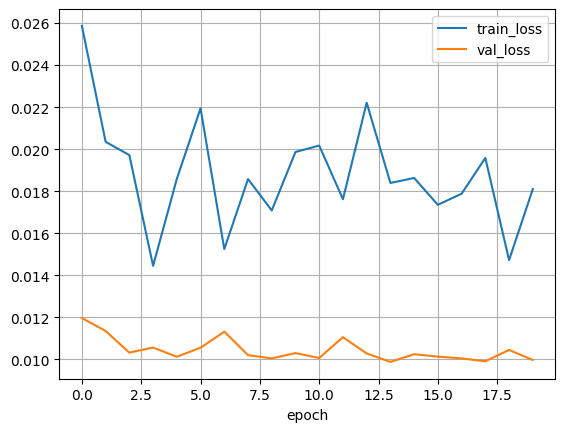

In [131]:
import pandas as pd

trainer = pl.Trainer(
    devices=1, accelerator="gpu",
    max_epochs=20,
callbacks=[model_checkpoint], # TODO 4
    logger=logger
  )

trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
print(f"Logs stored at {logger.log_dir}/metrics.csv")


## Plot metrics
(
    pd.read_csv(f'{logger.log_dir}/metrics.csv') .groupby('epoch').mean()
    [['train_loss', 'val_loss']].plot(grid=True)
)

In [132]:
print(f"""
    Best model saved at {model_checkpoint.best_model_path}
    With validation loss {model_checkpoint.best_model_score}
""")

# Loading best model
best_model = LitModel.load_from_checkpoint(model_checkpoint.best_model_path)


    Best model saved at logs/cnn_interp/version_11/checkpoints/epoch=13-step=1008.ckpt
    With validation loss 0.009883655235171318



In [133]:
### Explained variance for the convolutional auto-encoder
trainer.test(best_model, dataloaders=test_loader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.01645852066576481    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.01645852066576481}]

In [134]:
def compute_metrics(xref,x):
  MSE = np.mean( (xref-x)**2 )
  RMSE = np.sqrt( MSE )

  NMSE = 1. - MSE / np.var(xref)

  return MSE,RMSE,NMSE


metrics_oi = compute_metrics( best_model.test_data[0] , best_model.test_data[2])
metrics_rec = compute_metrics( best_model.test_data[0] , best_model.test_data[-1])

print('..... OI: rmse = %.3f  --- explained variance = %.3f '%(metrics_oi[1],metrics_oi[2]))
print('..... OI: rmse = %.3f  --- explained variance = %.3f '%(metrics_rec[1],metrics_rec[2]))

..... OI: rmse = 0.053  --- explained variance = 0.982 
..... OI: rmse = 0.051  --- explained variance = 0.983 


Text(0.5, 1.0, 'nn error')

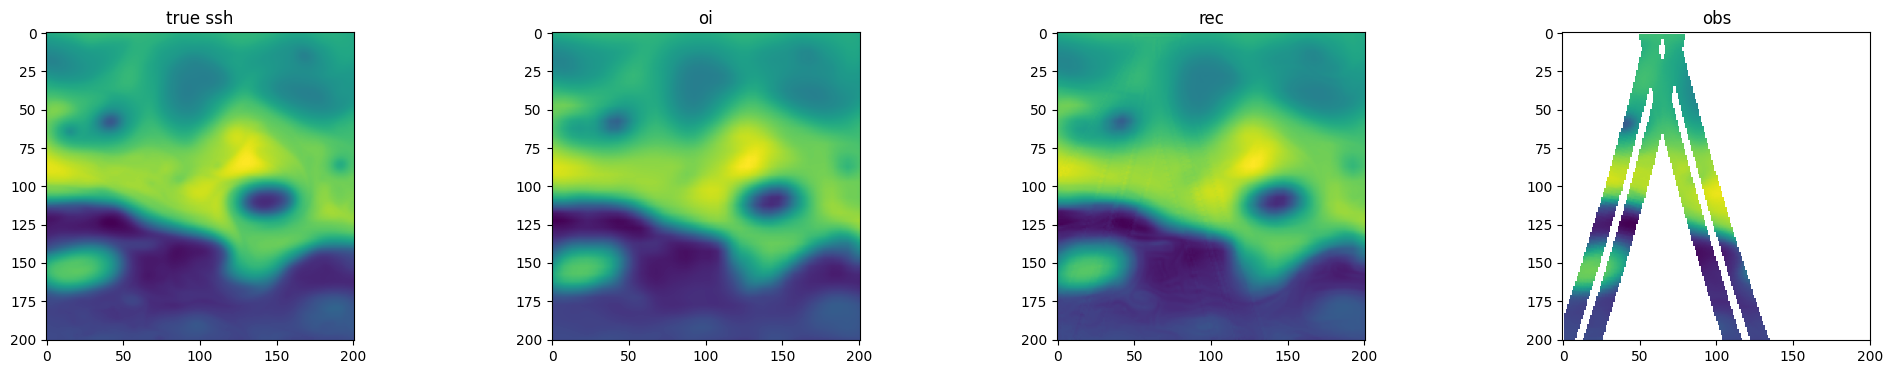

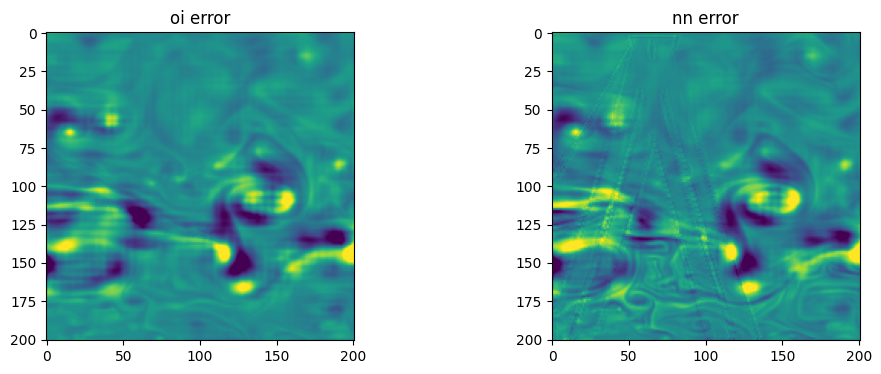

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = 5
err_max = 0.1

ssh = best_model.test_data[0][idx,:,:]
oi = best_model.test_data[2][idx,:,:]
obs = best_model.test_data[3][idx,:,:]
rec = best_model.test_data[4][idx,:,:]

fig = plt.figure(figsize=(25, 4))
ax=fig.add_subplot(1, 4, 1)
ax.imshow(ssh, cmap='viridis')
ax.set_title('true ssh')
ax=fig.add_subplot(1, 4, 2)
ax.imshow(oi, cmap='viridis')
ax.set_title('oi')
ax=fig.add_subplot(1, 4, 4)
ax.imshow(obs, cmap='viridis')
ax.set_title('obs')
ax=fig.add_subplot(1, 4, 3)
ax.imshow(rec, cmap='viridis')
ax.set_title('rec')


fig = plt.figure(figsize=(25, 4))
ax=fig.add_subplot(1, 4, 1)
ax.imshow(oi-ssh, vmin=-err_max,vmax=err_max,cmap='viridis')
ax.set_title('oi error')
ax=fig.add_subplot(1, 4, 2)
ax.imshow(rec-ssh, vmin=-err_max,vmax=err_max,cmap='viridis')
ax.set_title('nn error')


#### Visualize amplitude of the gradients

In [ ]:
def sobel(da):
    dx = xr.apply_ufunc(lambda _da: ndi.sobel(_da, -1), da)
    dy = xr.apply_ufunc(lambda _da: ndi.sobel(_da, -2), da)
    return np.hypot(dx, dy)

grad_ds = xr.Dataset({
    r'||$\nabla ssh||$': ref_ds.ssh.pipe(sobel),
    r'||$\nabla oi||$': oi_ds.ssh_mod.pipe(sobel),
    'obs mask': np.isfinite(obs_ds.ssh_mod),
})
grad_ds.to_array().isel(time=3).plot.pcolormesh(col='variable', figsize=(20, 6), cmap='viridis')

#### Example animation

In [ ]:
hv.extension('matplotlib')
to_plot_ds = grad_ds.isel(time=slice(25, 55, 1))

clim = (
    to_plot_ds[[r'||$\nabla ssh||$', r'||$\nabla oi||$']]
    .to_array().pipe(lambda da: (da.quantile(0.005).item(), da.quantile(0.995).item()))
)
images = hv.Layout([
        hv.Dataset(to_plot_ds)
        .to(hv.QuadMesh, ['lon', 'lat'], v).relabel(v)
        .options(cmap='viridis',clim=clim)
        for v in to_plot_ds
]).cols(3).opts(sublabel_format="")

hv.output(images, holomap='gif', fps=2, dpi=125)

## Additional data

Here are the link from other files that may be of interest:

**Other quantities:**
- Sea surface temperature from NATL60 simulation: https://s3.us-east-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_sst_y2013.1y.nc
- Sea surface currents from NATL60 simulation: https://s3.us-east-1.wasabisys.com/melody/osse_data/ref/NATL60-CJM165_GULFSTREAM_sss_y2013.1y.nc


**Other observation configurations:**
- Nadirs only:
  - obs: https://s3.us-east-1.wasabisys.com/melody/osse_data/data/gridded_data_swot_wocorr/dataset_nadir_0d.nc
  - oi: https://s3.us-east-1.wasabisys.com/melody/osse_data/oi/ssh_NATL60_4nadir.nc

- SWOT only:
  - obs: https://s3.us-east-1.wasabisys.com/melody/osse_data/data/gridded_data_swot_wocorr/dataset_swot.nc
  - oi: https://s3.us-east-1.wasabisys.com/melody/osse_data/oi/ssh_NATL60_swot.nc